In [308]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go

from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

import pickle

In [309]:
colors_ext = ['#f5edd3', '#ecddab', '#e4cd82', '#dbbd5a', '#d2ad32', '#ae8e25', '#866d1c', '#5e4c14', '#352b0b']  #shades of "gold", from lightest to darkest (with help from icolorpalette.com)
name = 'golds_ext'
golds_ext = LinearSegmentedColormap.from_list(name, colors_ext, N=100)

colors = ['#dbbd5a', '#d2ad32', '#ae8e25']  #shades of "gold", from lightest to darkest (with help from icolorpalette.com)
cmap_name_ = 'golds'
golds = LinearSegmentedColormap.from_list(cmap_name_, colors, N=100)

Golds = sns.color_palette(colors)
Golds_ext = sns.color_palette(colors_ext)

In [310]:
movies = pd.read_csv('../data/movies_1990_2020_with_detail_oscars_complete.csv', index_col= 'tconst', low_memory=False)
oscar_movies = movies[movies['Oscars']>0]
oscar_best_movies = movies[movies['picture_NW'].notna()]

In [311]:
tconst_title = pickle.load(open('../pickles/tconst_title.p', 'rb'))

In [312]:
X_vars_all = ['runtimeMinutes', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 
       'Warner Bros.', 'Universal Pictures', 'Columbia Pictures',
       'Paramount Pictures', 'Dreamworks Pictures', 'Walt Disney Pictures',
       'Miramax', 'Twentieth Century Fox', 'New Line Cinema', 'Focus Features',
       'Fox Searchlight Pictures', 'Touchstone Pictures',
       'Walt Disney Animation Studios', 'BBC Films', 'TriStar Pictures',
       'New Regency Productions', 'Fox 2000 Pictures', 'The Weinstein Company',
       'Annapurna Pictures', 'Castle Rock Entertainment',
        'oscars_post_release', 'US_open_WE', 'prev_Oscars_f', 'rel_USA', 'prev_Oscar_wins_nm', 'prev_Oscar_noms_nm',
       'rel__aug', 'rel__dec', 'rel__feb', 'rel__jan', 'rel__jul', 'rel__jun',
       'rel__mar', 'rel__may', 'rel__nov', 'rel__oct', 'rel__sep', 'budget_USD']

In [313]:
stan = StandardScaler()
X = stan.fit_transform(oscar_movies[X_vars_all])

#  All Oscar movies (any nominations or wins)

## K-Means Clustering

In [314]:
scores = []
for k in range(2,101):
    cl = KMeans(n_clusters=k)
    cl.fit(X)
    inertia = cl.inertia_
    sil = silhouette_score(X,  cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

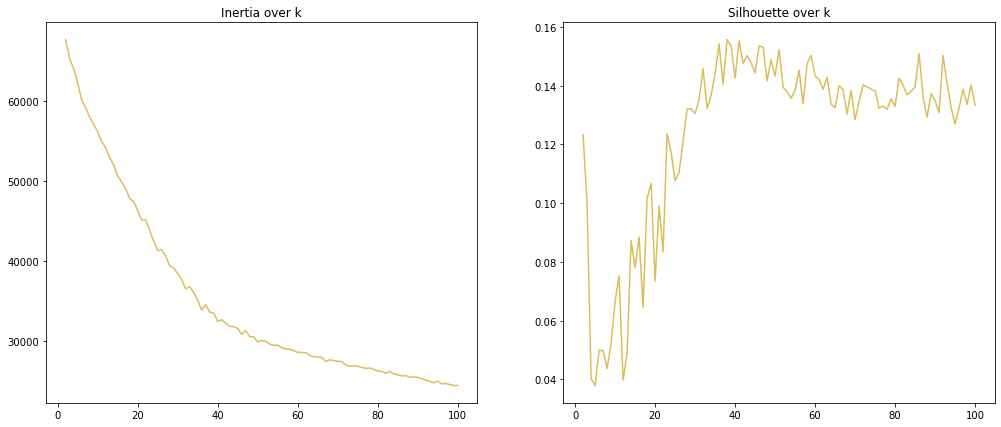

In [341]:
fig, axes = plt.subplots(1,2,figsize = (17,7))
axes[0].plot(score_df.k, score_df.inertia, color = '#dbbd5a')
axes[0].set_title('Inertia over k')

axes[1].plot(score_df.k, score_df.silhouette, color = '#dbbd5a')
axes[1].set_title('Silhouette over k');

In [316]:
km = KMeans(n_clusters = 40, random_state = 113)
km.fit(X)
X_df = pd.DataFrame(index = oscar_movies.index, data = X, columns = oscar_movies[X_vars_all].columns)
X_df['cluster']=km.labels_
#X_df.head()

In [317]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(index = oscar_movies.index, data = X_pca)

X_pca_df['cluster'] = X_df['cluster']

X_pca_df['title'] = X_pca_df.index.map(tconst_title)

X_pca_df.sort_values(['cluster'], inplace = True)
X_pca_df.head()

,0,1,cluster,title
tconst,,,,
tt0116886,-2.132032,-1.769895,0,The Line King: The Al Hirschfeld Story
tt5873150,-1.720343,-1.720691,0,Strong Island
tt0120776,-0.837211,0.408730,0,One True Thing
tt0468489,-1.637692,-0.479826,0,Half Nelson
tt1615147,-1.698424,0.063587,0,Margin Call


In [333]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
eigenvectors = pd.DataFrame(pca.components_.T, index = X_vars_all)
eigenvectors.sort_values([0], ascending = False, inplace = True)

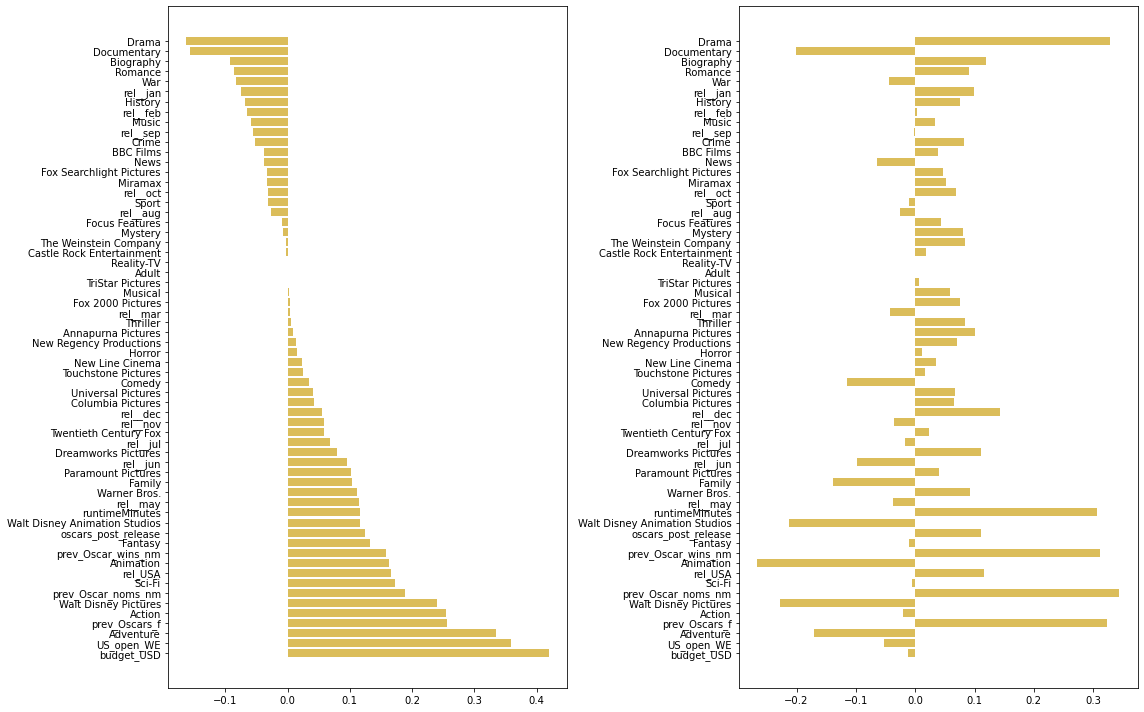

In [340]:
plt.figure(figsize = (16,10))
plt.subplot(1,2,1)
plt.barh(eigenvectors.index, eigenvectors[0], color = '#dbbd5a')
plt.subplot(1,2,2)
plt.barh(eigenvectors.index, eigenvectors[1], color = '#dbbd5a')
plt.tight_layout();

In [13]:
for k in range(40):
    print(X_pca_df[X_pca_df['cluster']==k]['title'].unique())
    print("")

['The Line King: The Al Hirschfeld Story' 'Strong Island' 'One True Thing'
 'Half Nelson' 'Margin Call' 'Amour' 'Evil' 'Frozen River' 'Corpse Bride'
 'In the Valley of Elah' '12' 'Loving Vincent' 'Sully' 'Rambling Rose'
 'Ghost World' 'Prisoners' 'The Baader Meinhof Complex' 'Blue Sky' 'Drive'
 'Almost Famous' 'American Splendor' 'Ajami' 'The Town' 'A War'
 'Waco: The Rules of Engagement' 'Postcards from the Edge'
 'The Commitments' '3:10 to Yuma' 'Deepwater Horizon'
 'Hale County This Morning, This Evening' 'As It Is in Heaven'
 'The Black Dahlia' 'Alone Yet Not Alone' 'Goodfellas' 'Unstrung Heroes'
 'The Illusionist' 'Fly Away Home' 'Yesterday' 'Junebug']

['Lion' "The King's Speech" 'Sicko' 'Silver Linings Playbook'
 'August: Osage County' 'Carol' 'Vicky Cristina Barcelona' 'The Reader'
 'My Week with Marilyn' 'Django Unchained' 'Philomena'
 'Inglourious Basterds']

['Frozen II' 'Big Hero 6' 'Wreck-It Ralph' 'Tangled' 'Lilo & Stitch'
 'Bolt' 'Moana' 'Mulan' 'Pocahontas' "The Emperor

In [71]:
goldies = ['#fcfaf4', '#f2e8c5', '#e8d596','#dec267', '#d4af38', '#ae8e25', '#866d1c', '#5e4c14', '#352b0b', '#0d0a02']

cluster_color = {c: col for c, col in zip(X_pca_df['cluster'].unique(), goldies * 4)}

X_pca_df['color'] = X_pca_df['cluster'].map(cluster_color)

In [115]:
f = go.FigureWidget([go.Scatter(x=X_pca_df[X_pca_df['cluster'].between(0,40)][0], 
                                y=X_pca_df[X_pca_df['cluster'].between(0,40)][1], 
                                mode='markers', hoverinfo = 'text', hovertext = X_pca_df['title'], fill = 'none')])

scatter = f.data[0]
colors = ['#d2ad32'] * X_pca_df.shape[0]
scatter.marker.symbol = 'star'
scatter.marker.color = X_pca_df['color']
scatter.marker.opacity = 0.5
scatter.marker.size = [10] * X_pca_df.shape[0]
f.layout.hovermode = 'closest'
f.update_layout(width=1600, height=850, plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='#1d1d1d')
f.update_xaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)
f.update_yaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)

# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        s[i] = 20
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s

scatter.on_click(update_point)

f.write_html("../visualizations/oscar_movie_clusters.html")
f

FigureWidget({
    'data': [{'fill': 'none',
              'hoverinfo': 'text',
              'hovertext': arr…

In [14]:
def plot_clusters(start_k, end_k):
    subset = X_pca_df[X_pca_df['cluster'].between(start_k,end_k)]
    plt.figure(figsize = (10,10))
    plt.scatter(subset[0], subset[1], c = subset['cluster'], alpha = 0.6, marker = '*', s = 100)

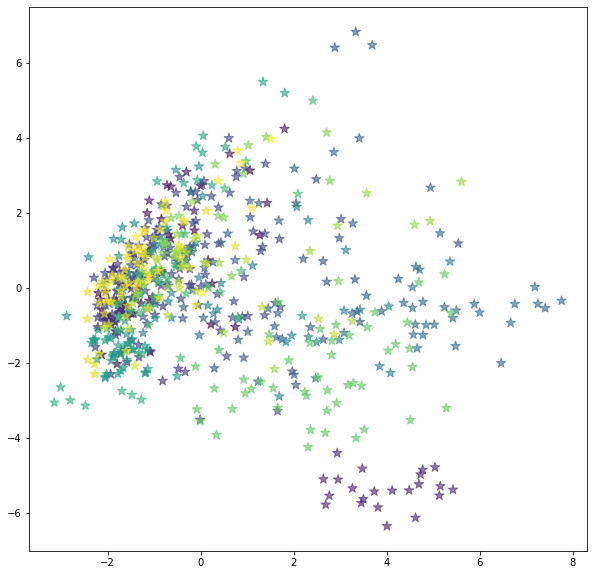

In [84]:
plot_clusters(0,20)

# Clustering using DBSCAN

In [90]:
def find_best_silhouette(df): 
    # start with the lowest possible score
    max_score = -1
    # scale the data
    ss = StandardScaler()
    df_scaled = ss.fit_transform(df)
    scores = []
    cluster_sizes  = []
    #for loop over the 50 values from .2 to 5
    for eps in np.linspace(.2, 5, 50):
        # for loop the minimum samples
        for min_samples in range(2, int(len(df)/2)):
            # do the clustering
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(df_scaled)
            # check if you have enough labels, because obviously < 2 is a deal-breaker
            if len(set(dbscan.labels_)) > 1:
                # get the silhouette score
                score = silhouette_score(df_scaled, dbscan.labels_)
                nclusters = len(set(dbscan.labels_))
                scores.append(score)
                cluster_sizes.append(nclusters)
                # if the score is the best yet, save it!
                if score > max_score:
                    max_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_clusters = nclusters
    # print out the results
    print(f'Best silhouette score was {round(max_score, 2)}')
    print(f'Best eps was {round(best_eps, 2)}')
    print(f'Best min_samples was {best_min_samples}.')
    print(f'The model found {best_clusters} clusters.')
    print('Hurray! 🎉')
    return scores, cluster_sizes

In [117]:
#find_best_silhouette(X)

**When ran on a virtual machine, the search returned:**<br>
Best silhouette score was 0.04<br>
Best eps was 4.9<br>
Best min_samples was 12<br>
The model found 3 clusters<br>
Hurray! 🎉

In [118]:
epss = pickle.load(open('../pickles/epss.p', 'rb'))
min_smpl_szs = pickle.load(open('../pickles/min_smpl_szs.p', 'rb'))
cluster_sizes = pickle.load(open('../pickles/cluster_sizes.p', 'rb'))
scores = pickle.load(open('../pickles/scores.p', 'rb'))

In [123]:
db_scores_df = pd.DataFrame(data = np.array([epss, min_smpl_szs, cluster_sizes, scores]).T, 
                            columns = ['epss', 'min_smpl_szs', 'cluster_sizes', 'scores'])
db_scores_df.sort_values(['epss', 'min_smpl_szs'], ascending = True, inplace = True)
db_scores_df.head()

,epss,min_smpl_szs,cluster_sizes,scores
0,0.200000,2.0,11.0,-0.261935
1,0.200000,3.0,5.0,-0.237593
2,0.200000,4.0,2.0,-0.220113
3,0.297959,2.0,16.0,-0.260688
4,0.297959,3.0,6.0,-0.235082


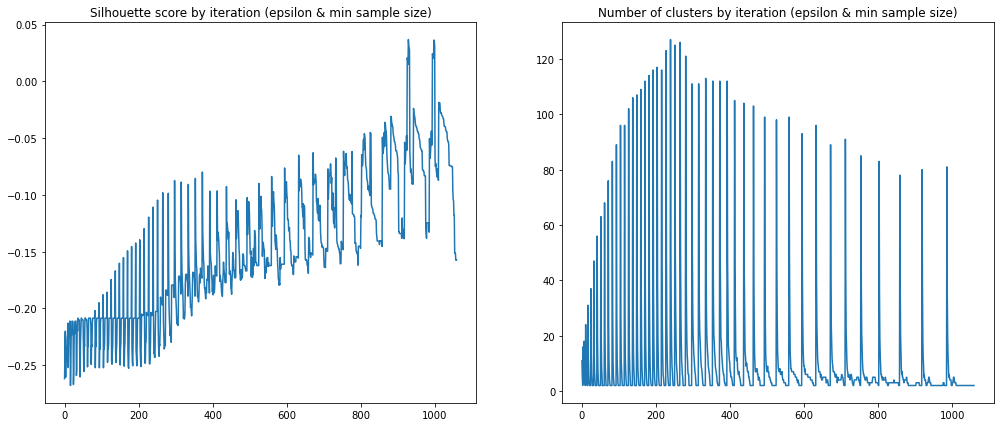

In [119]:
fig, axes = plt.subplots(1,2,figsize = (17,7))
axes[0].plot(range(len(scores)), scores)
axes[0].set_title('Silhouette score by iteration (epsilon & min sample size)')

axes[1].plot(range(len(cluster_sizes)), cluster_sizes)
axes[1].set_title('Number of clusters by iteration (epsilon & min sample size)');

In [137]:
db = DBSCAN(eps=4.9, min_samples=12) # using best parameters found above
db.fit(X)
X_db_df = pd.DataFrame(index = oscar_movies.index, data = X, columns = oscar_movies[X_vars_all].columns)
X_db_df['cluster']=db.labels_
X_db_df.head()

,runtimeMinutes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,rel__jan,rel__jul,rel__jun,rel__mar,rel__may,rel__nov,rel__oct,rel__sep,budget_USD,cluster
tconst,,,,,,,,,,,,,,,,,,,,,
tt0035423,0.019239,-0.41103,0.0,-0.505998,-0.311703,-0.465256,1.784745,-0.384254,-0.362464,-1.455056,...,-0.382821,-0.231727,-0.276476,-0.219456,-0.231727,-0.379947,-0.311703,-0.2435,0.124594,-1
tt0097766,-0.562083,-0.41103,0.0,-0.505998,-0.311703,-0.465256,1.784745,-0.384254,-0.362464,0.687259,...,-0.382821,-0.231727,-0.276476,-0.219456,-0.231727,-0.379947,3.208185,-0.2435,-0.726868,0
tt0099012,-0.517366,-0.41103,0.0,-0.505998,-0.311703,-0.465256,1.784745,-0.384254,-0.362464,-1.455056,...,2.612189,-0.231727,-0.276476,-0.219456,-0.231727,-0.379947,-0.311703,-0.2435,-0.524826,0
tt0099028,-0.875103,-0.41103,0.0,-0.505998,-0.311703,-0.465256,-0.560304,-0.384254,2.758897,-1.455056,...,-0.382821,-0.231727,-0.276476,-0.219456,-0.231727,-0.379947,3.208185,-0.2435,-0.741119,0
tt0099073,0.466410,-0.41103,0.0,-0.505998,-0.311703,-0.465256,-0.560304,-0.384254,-0.362464,0.687259,...,-0.382821,-0.231727,-0.276476,-0.219456,-0.231727,-0.379947,3.208185,-0.2435,-0.380511,-1


In [138]:
X_db_df['cluster'].unique()

array([-1,  0,  1])

###  PCA and visualization of clustering using 2 Principal Components

In [287]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

X_pca_db_df = pd.DataFrame(index = oscar_movies.index, data = X_pca)
X_pca_db_df = X_db_df['cluster']
X_pca_db_df['title'] = X_pca_db_df.index.map(tconst_title)
X_pca_db_df.sort_values(['cluster'], inplace = True)

X_pca_db_df.head(5)

ValueError: Shape of passed values is (183483, 2), indices imply (1197, 2)

In [142]:
for k in range(-1,2): # change to match best # of clusters
    print(X_pca_db_df[X_pca_db_df['cluster']==k]['title'].unique())
    print("")

['The Line King: The Al Hirschfeld Story' 'All Is Lost' 'Sleepers'
 'Michael Collins' 'Anonymous' 'The Ides of March' 'Training Day'
 'American Beauty' 'The Grandfather' 'Never Look Away' 'Ida'
 'Nightcrawler' 'The Contender' 'Jackass Presents: Bad Grandpa' 'Border'
 'The Judge' 'The Departed' 'North Country' 'Marie Antoinette' 'The Lover'
 'Joker' 'Across the Universe' 'Lo que le pasó a Santiago' 'Dreamgirls'
 'Mrs. Brown' 'Lagaan: Once Upon a Time in India' 'Gattaca' 'Mr. Turner'
 'Gangs of New York' 'Georgia' 'Restoration' 'Bullets Over Broadway'
 'Music of the Heart' 'Little Voice' 'Mr. & Mrs. Bridge'
 'The Talented Mr. Ripley' 'The Hours' 'Shakespeare in Love'
 'Good Will Hunting' 'Sling Blade' 'The Wings of the Dove' 'Frida'
 'The Cider House Rules' 'The Lobster' 'The Age of Innocence' 'Sicario'
 'Heavenly Creatures' 'Rachel Getting Married' 'Marshall' 'Changeling'
 'Short Cuts' 'Quiz Show' 'Malena' 'Nine' 'Paris 36' 'Free Solo'
 'Seabiscuit' 'Three Billboards Outside Ebbing, Mis

In [144]:
goldies_db = ['#fcfaf4', '#d4af38', '#352b0b']

cluster_color_db = {c: col for c, col in zip(X_pca_db_df['cluster'].unique(), goldies_db)}

X_pca_db_df['color'] = X_pca_db_df['cluster'].map(cluster_color_db)

In [145]:
f = go.FigureWidget([go.Scatter(x=X_pca_db_df[0], 
                                y=X_pca_db_df[1], 
                                mode='markers', hoverinfo = 'text', hovertext = X_pca_df['title'], fill = 'none')])

scatter = f.data[0]
colors = ['#d2ad32'] * X_pca_db_df.shape[0]
scatter.marker.symbol = 'star'
scatter.marker.color = X_pca_db_df['color']
scatter.marker.opacity = 0.7
scatter.marker.size = [5] * X_pca_db_df.shape[0]
f.layout.hovermode = 'closest'
f.update_layout(width=1600, height=850, plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='#1d1d1d')
f.update_xaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)
f.update_yaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)

# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        s[i] = 10
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s

scatter.on_click(update_point)

f.write_html("../visualizations/oscar_movie_clusters_db.html")
f

FigureWidget({
    'data': [{'fill': 'none',
              'hoverinfo': 'text',
              'hovertext': arr…

In [115]:
def plot_clusters(start_k, end_k):
    subset = X_pca_df[X_pca_df['cluster'].between(start_k,end_k)]
    plt.figure(figsize = (10,10))
    plt.scatter(subset[0], subset[1], c = subset['cluster'], alpha = 0.6, marker = '*', s = 100)

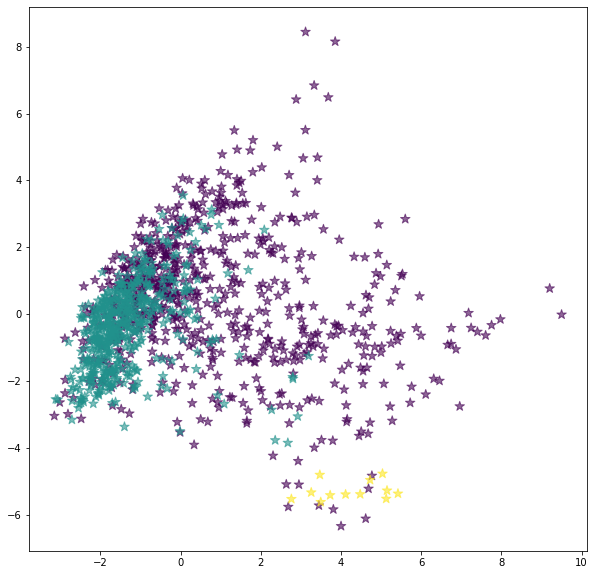

In [116]:
plot_clusters(-1,2)

#  Oscar movies with Best Picture nominations or wins

## K-Means Clustering

In [240]:
X = stan.fit_transform(oscar_best_movies[X_vars_all])

In [241]:
scores = []
for k in range(2,101):
    cl = KMeans(n_clusters=k)
    cl.fit(X)
    inertia = cl.inertia_
    sil = silhouette_score(X,  cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

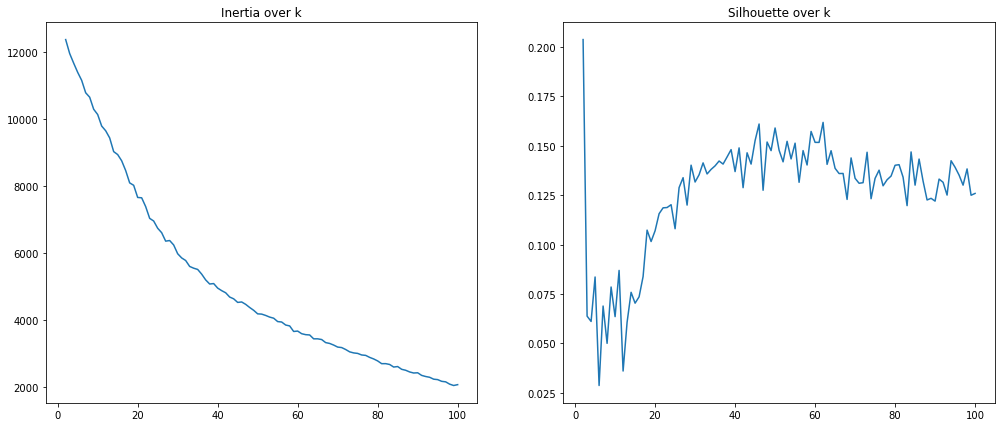

In [242]:
fig, axes = plt.subplots(1,2,figsize = (17,7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')

axes[1].plot(score_df.k, score_df.silhouette)
axes[1].set_title('Silhouette over k');

In [243]:
km = KMeans(n_clusters = 25, random_state = 113)
km.fit(X)
X_df = pd.DataFrame(index = oscar_best_movies.index, data = X, columns = oscar_best_movies[X_vars_all].columns)
X_df['cluster']=km.labels_

In [245]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(index = oscar_best_movies.index, data = X_pca)

X_pca_df['cluster'] = X_df['cluster']

X_pca_df['title'] = X_pca_df.index.map(tconst_title)

X_pca_df.sort_values(['cluster'], inplace = True)
X_pca_df.head(20)

,0,1,cluster,title
tconst,,,,
tt1781769,-1.598751,-0.014210,0,Anna Karenina
tt0381849,-0.218151,0.435771,0,3:10 to Yuma
tt1602620,-1.995059,1.733508,0,Amour
tt0119488,-1.119141,0.078618,0,L.A. Confidential
tt0119164,-1.216284,1.758494,0,The Full Monty
tt0099685,-1.516451,0.704694,0,Goodfellas
tt0120815,0.537943,-3.370771,1,Saving Private Ryan
tt5027774,-0.867037,0.403884,1,"Three Billboards Outside Ebbing, Missouri"
tt0172495,2.290956,-0.491951,1,Gladiator


In [246]:
for k in range(25):
    print(X_pca_df[X_pca_df['cluster']==k]['title'].unique())
    print("")

['Anna Karenina' '3:10 to Yuma' 'Amour' 'L.A. Confidential'
 'The Full Monty' 'Goodfellas']

['Saving Private Ryan' 'Three Billboards Outside Ebbing, Missouri'
 'Gladiator' 'Lady Bird' 'A Series of Unfortunate Events' 'Fences'
 'The Aviator' 'Saving Mr. Banks' 'American Sniper' 'The Hateful Eight'
 'Manchester by the Sea' 'A Beautiful Mind' 'Titanic' 'La La Land'
 'The Lord of the Rings: The Fellowship of the Ring' 'The Descendants'
 'The Curious Case of Benjamin Button' 'Marriage Story' 'War Horse'
 'Once Upon a Time... In Hollywood' 'The Godfather: Part III'
 'The Wolf of Wall Street' 'Sherlock Holmes' 'The Irishman' 'True Grit'
 'The Favourite' 'Letters from Iwo Jima' 'Vice'
 'The Lord of the Rings: The Two Towers'
 'Extremely Loud & Incredibly Close' 'The Revenant' 'The Shape of Water'
 'The Big Short']

['Jackie' 'Frost/Nixon' "The King's Speech" 'Mr. Turner' 'Hacksaw Ridge'
 '12 Years a Slave' 'The Queen' 'Munich' 'Selma'
 'Good Night, and Good Luck.' 'Defiance' 'Hidden Figures' 

In [251]:
goldies = ['#fcfaf4', '#f2e8c5', '#e8d596','#dec267', '#d4af38', '#ae8e25', '#866d1c', '#5e4c14', '#352b0b', '#0d0a02']

cluster_color = {c: col for c, col in zip(X_pca_df['cluster'].unique(), goldies*2 + goldies[:5])}

X_pca_df['color'] = X_pca_df['cluster'].map(cluster_color)

In [252]:
f = go.FigureWidget([go.Scatter(x=X_pca_df[0], y=X_pca_df[1],
                                mode='markers', hoverinfo = 'text', hovertext = X_pca_df['title'], fill = 'none')])

scatter = f.data[0]
scatter.marker.symbol = 'star'
scatter.marker.color = X_pca_df['color']
scatter.marker.opacity = 0.5
scatter.marker.size = [15] * X_pca_df.shape[0]
f.layout.hovermode = 'closest'
f.update_layout(width=800, height=850, plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='#1d1d1d')
f.update_xaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)
f.update_yaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)

# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        s[i] = 40
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s

scatter.on_click(update_point)

#f.write_html("../visualizations/oscar_best_movie_clusters.html")
f

FigureWidget({
    'data': [{'fill': 'none',
              'hoverinfo': 'text',
              'hovertext': arr…

In [257]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

X_pca_df = pd.DataFrame(index = oscar_best_movies.index, data = X_pca)

X_pca_df['cluster'] = X_df['cluster']
X_pca_df['color'] = X_pca_df['cluster'].map(cluster_color)

X_pca_df['title'] = X_pca_df.index.map(tconst_title)

X_pca_df.sort_values(['cluster'], inplace = True)
X_pca_df.head(20)

,0,1,2,cluster,color,title
tconst,,,,,,
tt1781769,-1.598751,-0.014210,0.639681,0,#fcfaf4,Anna Karenina
tt0381849,-0.218151,0.435771,-1.885200,0,#fcfaf4,3:10 to Yuma
tt1602620,-1.995059,1.733508,-0.399211,0,#fcfaf4,Amour
tt0119488,-1.119141,0.078618,-2.365500,0,#fcfaf4,L.A. Confidential
tt0119164,-1.216284,1.758494,0.729720,0,#fcfaf4,The Full Monty
tt0099685,-1.516451,0.704694,-2.293718,0,#fcfaf4,Goodfellas
tt0120815,0.537943,-3.370771,0.532014,1,#f2e8c5,Saving Private Ryan
tt5027774,-0.867037,0.403884,1.294793,1,#f2e8c5,"Three Billboards Outside Ebbing, Missouri"
tt0172495,2.290956,-0.491951,-2.266190,1,#f2e8c5,Gladiator


In [277]:
import plotly.express as px
fig = px.scatter_3d(x=X_pca_df[0],  y=X_pca_df[1], z = X_pca_df[2], color = X_pca_df['cluster'], hover_name=X_pca_df['title'],
                      custom_data='', opacity = 0.6, width = 800, height = 800, title = 'Clusters of Oscar Best Picture movies')

scatter = fig.data[0]
scatter.marker.symbol = 'diamond'
scatter.marker.color = X_pca_df['color']
scatter.marker.opacity = 0.5
scatter.marker.size = [15] * X_pca_df.shape[0]

f.update_layout(width=800, height=850, plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='#1d1d1d')
f.update_xaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)
f.update_yaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)

fig.show()

In [200]:
def plot_clusters(start_k, end_k):
    subset = X_pca_df[X_pca_df['cluster'].between(start_k,end_k)]
    plt.figure(figsize = (10,10))
    plt.scatter(subset[0], subset[1], c = subset['cluster'], alpha = 0.6, marker = '*', s = 100)

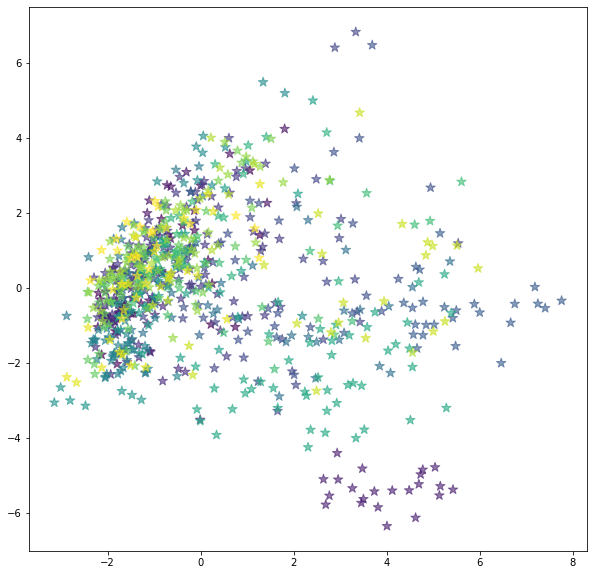

In [160]:
plot_clusters(0,25)

# Clustering using DBSCAN

In [90]:
def find_best_silhouette(df): 
    # start with the lowest possible score
    max_score = -1
    # scale the data
    ss = StandardScaler()
    df_scaled = ss.fit_transform(df)
    scores = []
    cluster_sizes  = []
    #for loop over the 50 values from .2 to 5
    for eps in np.linspace(.2, 5, 50):
        # for loop the minimum samples
        for min_samples in range(2, int(len(df)/2)):
            # do the clustering
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(df_scaled)
            # check if you have enough labels, because obviously < 2 is a deal-breaker
            if len(set(dbscan.labels_)) > 1:
                # get the silhouette score
                score = silhouette_score(df_scaled, dbscan.labels_)
                nclusters = len(set(dbscan.labels_))
                scores.append(score)
                cluster_sizes.append(nclusters)
                # if the score is the best yet, save it!
                if score > max_score:
                    max_score = score
                    best_eps = eps
                    best_min_samples = min_samples
                    best_clusters = nclusters
    # print out the results
    print(f'Best silhouette score was {round(max_score, 2)}')
    print(f'Best eps was {round(best_eps, 2)}')
    print(f'Best min_samples was {best_min_samples}.')
    print(f'The model found {best_clusters} clusters.')
    print('Hurray! 🏆')
    return scores, cluster_sizes

In [117]:
#find_best_silhouette(X)

**When ran on a virtual machine, the search returned:**<br>
Best silhouette score was -0.02<br>
Best eps was 5.0<br>
Best min_samples was 6<br>
The model found 2 clusters<br>
Hurray! 🏆

In [169]:
db = DBSCAN(eps=5, min_samples=6) # using best parameters found above
db.fit(X)
X_db_df = pd.DataFrame(index = oscar_best_movies.index, data = X, columns = oscar_best_movies[X_vars_all].columns)
X_db_df['cluster']=db.labels_
X_db_df.head()

,runtimeMinutes,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,rel__jan,rel__jul,rel__jun,rel__mar,rel__may,rel__nov,rel__oct,rel__sep,budget_USD,cluster
tconst,,,,,,,,,,,,,,,,,,,,,
tt0099077,-0.371390,-0.382707,0.0,-0.455463,-0.203186,1.789889,-0.504127,-0.426956,0.0,0.382707,...,2.039385,-0.225668,-0.178377,-0.115728,-0.150075,-0.441290,-0.302235,-0.178377,-0.318258,0
tt0099348,2.297917,-0.382707,0.0,2.195567,-0.203186,-0.558694,-0.504127,-0.426956,0.0,0.382707,...,-0.490344,-0.225668,-0.178377,-0.115728,-0.150075,2.266084,-0.302235,-0.178377,-0.485222,0
tt0099653,-0.104460,-0.382707,0.0,-0.455463,-0.203186,-0.558694,-0.504127,-0.426956,0.0,0.382707,...,-0.490344,4.431294,-0.178377,-0.115728,-0.150075,-0.441290,-0.302235,-0.178377,-0.485222,-1
tt0099674,1.452636,-0.382707,0.0,-0.455463,-0.203186,-0.558694,-0.504127,2.342160,0.0,0.382707,...,-0.490344,-0.225668,-0.178377,-0.115728,-0.150075,-0.441290,-0.302235,-0.178377,0.108427,-1
tt0099685,0.740821,-0.382707,0.0,-0.455463,-0.203186,1.789889,-0.504127,2.342160,0.0,0.382707,...,-0.490344,-0.225668,-0.178377,-0.115728,-0.150075,-0.441290,-0.302235,5.606119,-0.429568,-1


In [170]:
X_db_df['cluster'].unique()

array([ 0, -1])

In [180]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

X_pca_db_df = pd.DataFrame(index = oscar_best_movies.index, data = X_pca)

X_pca_db_df['cluster'] = X_db_df['cluster']

X_pca_db_df['title'] = X_pca_db_df.index.map(tconst_title)

X_pca_db_df.sort_values(['cluster'], inplace = True)
X_pca_db_df.head(10)

,0,1,cluster,title
tconst,,,,
tt0842926,-1.402397,0.749682,-1,The Kids Are All Right
tt0783233,-1.567066,0.339474,-1,Atonement
tt2582782,-0.518386,0.873491,-1,Hell or High Water
tt0816442,-0.463906,-2.763361,-1,The Book Thief
tt0816692,3.327196,-2.855536,-1,Interstellar
tt7349662,-0.722983,1.989806,-1,BlacKkKlansman
tt2562232,-0.898882,0.608797,-1,Birdman or (The Unexpected Virtue of Ignorance)
tt0878804,-1.066263,0.237332,-1,The Blind Side
tt0887912,-1.798721,1.143579,-1,The Hurt Locker


In [181]:
for k in range(-1,1): # change to match best # of clusters
    print(X_pca_db_df[X_pca_db_df['cluster']==k]['title'].unique())
    print("")

['The Kids Are All Right' 'Atonement' 'Hell or High Water'
 'The Book Thief' 'Interstellar' 'BlacKkKlansman'
 'Birdman or (The Unexpected Virtue of Ignorance)' 'The Blind Side'
 'The Hurt Locker' 'How to Train Your Dragon' 'WALL·E'
 'Star Wars: Episode IX - The Rise of Skywalker' 'The Fighter' 'Hugo'
 'The Reader' 'The Adventures of Tintin' 'Sherlock Holmes'
 'Star Wars: Episode VIII - The Last Jedi' 'Avatar'
 'Star Wars: Episode VII - The Force Awakens' 'Letters from Iwo Jima'
 'No Country for Old Men' 'The Departed' 'Django Unchained'
 'Pride & Prejudice' 'Little Women' 'The Curious Case of Benjamin Button'
 'Fantastic Mr. Fox' 'Toy Story 3' 'Lincoln' 'Little Miss Sunshine'
 'The Good German' 'Life of Pi' "Pan's Labyrinth" 'Michael Clayton'
 'Jojo Rabbit' 'Whiplash' 'There Will Be Blood'
 'Extremely Loud & Incredibly Close' 'The Tree of Life'
 'Million Dollar Baby' 'Milk' 'Mr. Turner' "The King's Speech"
 'A Star Is Born' 'Captain Phillips' 'Beasts of the Southern Wild'
 'War Horse' 

In [144]:
goldies_db = ['#fcfaf4', '#d4af38', '#352b0b']

cluster_color_db = {c: col for c, col in zip(X_pca_db_df['cluster'].unique(), goldies_db)}

X_pca_db_df['color'] = X_pca_db_df['cluster'].map(cluster_color_db)

In [145]:
f = go.FigureWidget([go.Scatter(x=X_pca_db_df[0], 
                                y=X_pca_db_df[1], 
                                mode='markers', hoverinfo = 'text', hovertext = X_pca_df['title'], fill = 'none')])

scatter = f.data[0]
colors = ['#d2ad32'] * X_pca_db_df.shape[0]
scatter.marker.symbol = 'star'
scatter.marker.color = X_pca_db_df['color']
scatter.marker.opacity = 0.7
scatter.marker.size = [15] * X_pca_db_df.shape[0]
f.layout.hovermode = 'closest'
f.update_layout(width=1600, height=850, plot_bgcolor='rgba(0,0,0,0)', paper_bgcolor='#1d1d1d')
f.update_xaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)
f.update_yaxes(showgrid=False, showticklabels=False, visible = True, zerolinecolor = '#5e4c14', zerolinewidth= 2)

# create our callback function
def update_point(trace, points, selector):
    c = list(scatter.marker.color)
    s = list(scatter.marker.size)
    for i in points.point_inds:
        s[i] = 40
        with f.batch_update():
            scatter.marker.color = c
            scatter.marker.size = s

scatter.on_click(update_point)

f.write_html("../visualizations/oscar_movie_clusters_db.html")
f

FigureWidget({
    'data': [{'fill': 'none',
              'hoverinfo': 'text',
              'hovertext': arr…

In [115]:
def plot_clusters(start_k, end_k):
    subset = X_pca_df[X_pca_df['cluster'].between(start_k,end_k)]
    plt.figure(figsize = (10,10))
    plt.scatter(subset[0], subset[1], c = subset['cluster'], alpha = 0.6, marker = '*', s = 100)

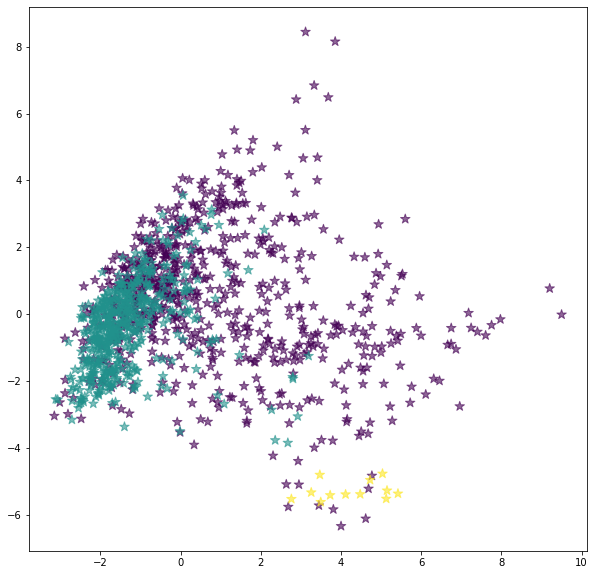

In [116]:
plot_clusters(-1,2)

# Clustering all movies:

In [278]:
movies.shape[0]

183483

In [279]:
X = stan.fit_transform(movies[X_vars_all])

pca = PCA(n_components = 2)
movies_pca = pca.fit_transform(X)

movies_pca_db_df = pd.DataFrame(index = movies.index, data = movies_pca)
movies_pca_db_df['title'] = movies_pca_db_df.index.map(tconst_title)

movies_pca_db_df.rename(columns = {0: 'pca1', 1: 'pca2'}, inplace = True)

movies_pca_db_df.head(5)

In [ ]:
# scores = []
# for k in range(2,101):
#     cl = KMeans(n_clusters=k)
#     cl.fit(X)
#     inertia = cl.inertia_
#     sil = silhouette_score(X,  cl.labels_)
#     scores.append([k, inertia, sil])
    
# score_df = pd.DataFrame(scores)
# score_df.columns = ['k', 'inertia', 'silhouette']

_When ran in a virtual environment, this search pointed to **45** as the best number of clusters for all movies in the dataset._

In [343]:
X = stan.fit_transform(movies[X_vars_all])

km_all = KMeans(n_clusters=45)
km_all.fit(X)

all_movies_clustered = pd.DataFrame(index = movies.index, data = km_all.labels_, columns = ['cluster'])
all_movies_clustered.sort_values(['cluster'], ascending = True, inplace = True);

In [344]:
all_movies_clustered['title'] = all_movies_clustered.index.map(tconst_title)

In [347]:
all_movies_clustered[all_movies_clustered['cluster']==33]

,cluster,title
tconst,,
tt0123987,33,Madeline
tt0108569,33,Wilder Napalm
tt0108174,33,So I Married an Axe Murderer
tt1276104,33,Looper
tt1630036,33,Courageous
tt0120213,33,Slappy and the Stinkers
tt0099073,33,Avalon
tt0117104,33,Mrs. Winterbourne
tt0118744,33,Hush


In [348]:
tconst_cluster = {t: c for t, c in zip(all_movies_clustered.index, all_movies_clustered.cluster)}

In [349]:
tconst_cluster['tt0206367']

33

In [350]:
pickle.dump(tconst_cluster, open('../pickles/tconst_cluster.p', 'wb'))